(sec_taylor)=
# Teorema de Taylor

El teorema de Taylor lo usaremos para aproximar en un punto una función compleja (en el sentido de que es difícil calcular su valor exacto en ese punto) mediante un polinomio de grado $n$ (fácilmente evaluable), para lo que necesitaremos que la función de partida sea derivable $n+1$ veces.


## Ejemplo práctico

Supongamos que queremos aproximar el valor del logaritmo neperiano de 1.3,  $\ln(1.3)$. Una primera aproximación sería tomar

$$
\ln(1.3)\approx\ln(1)=0.
$$
¿Podemos mejorar esta aproximación? La respuesta es sí. Basta con calcular la recta tangente a la función logaritmo por el punto $x=1$ (elegimos ese punto porque en él es fácil conocer la recta tangente y, además, está cerca de $1.3$) y *paseamos por la recta tangente* hasta el punto deseado (en este caso 1.3). Veámoslo en la siguiente gráfica:

El valor de ln(1.3) es:  0.262364264467491 

La recta tangente a f(x) = log(x)  en x=1 es: P1(x) = x - 1 



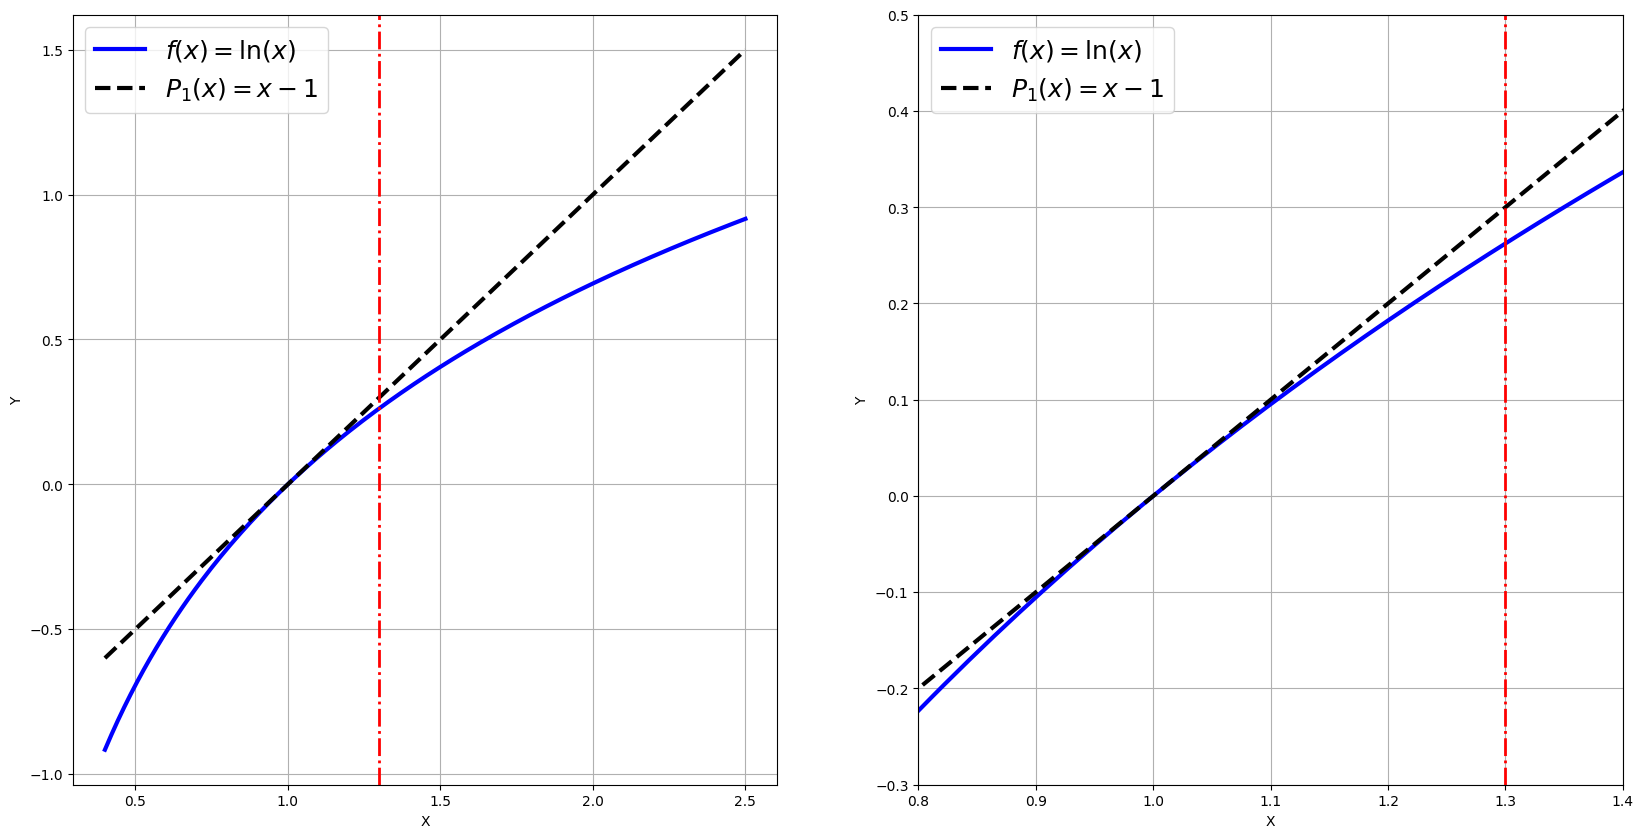

In [16]:
import numpy as np
import sympy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
mp.__version__

%matplotlib inline

# definimos la función
x = sp.symbols('x', real=True) # define la variable simbólica x
f_expr = sp.log(x)
f = sp.Lambda(x,f_expr)

print('El valor de ln(1.3) es: ', f(1.3),'\n')

# definimos la recta tangente por 1
f_der=  sp.diff(f(x),x)
f1 = sp.Lambda(x,f_der)
rt = f1(1)*(x-1) + f(1)

print('La recta tangente a f(x) =',f(x),' en x=1 es: P1(x) =', rt,'\n')

# punto de interés
x0 = 1.3

# Creamos gráficos de funciones
x1 = np.linspace(0.4, 2.5, 200)
y1 = np.log(x1)
y2 = f1(1)*(x1-1) + f(1)

fig, axs = plt.subplots(1, 2, figsize=(20,10))

ax1 = axs[0]
ax1.plot(x1, y1, c='b', lw='3',  label='$f(x)=\ln(x)$')
ax1.plot(x1, y2, c='k', ls='--', lw='3', label='$P_1(x)=x-1$')
ax1.axvline(x=1.3, c='red', ls='-.', lw='2')
ax1.set_ylabel('Y', fontsize=10)
ax1.set_xlabel('X', fontsize=10)
ax1.grid()
ax1.legend(prop={'size': 18})


ax2 = axs[1]
ax2.plot(x1, y1, c='b', lw='3', label='$f(x)=\ln(x)$')
ax2.plot(x1, y2, c='k', ls='--', lw='3', label='$P_1(x)=x-1$')
ax2.axvline(x=1.3, c='red', ls='-.', lw='2')
ax2.set_ylabel('Y', fontsize=10)
ax2.set_xlabel('X', fontsize=10)
plt.xlim(0.8,1.4)
plt.ylim(-0.3,0.5)
ax2.set_xticks(np.arange(0.8,1.5,0.1))
ax2.set_yticks(np.arange(-0.3,0.6,0.1))
ax2.grid()
ax2.legend(prop={'size': 18})


La idea es sencilla. Sabemos que la recta que es tangente a la función logaritmo neperiano en el punto $x_0=1$ <i>se parece</i> a la función $\ln$ cerca de ese punto. Además, es fácilmente calculable. ¡Basta, pues, evaluar la recta tangente en $1.3$ para tener una buena aproximación de $\ln(1.3)$!

Vamos a calcular esa recta tangente. Necesitamos la función y su derivada evaluadas en el punto $x_0$, es decir,

$$
\begin{array}{lr}
 f(x)=\ln(x) &\Rightarrow& f(x_0)=f(1)=\ln(1)=0, \\
 f'(x)=\frac{1}{x} &\Rightarrow& f'(x_0)=f'(1)=\frac{1}{1}=1. 
\end{array}
$$
Entonces la ecuación de la recta tangente es

$$
y=f(x_0)+f'(x_0)\left(x-x_0\right) \Rightarrow y=0+1(x-1)=x-1.
$$
Por tanto, el valor de la recta tangente en $x=1.3$ (que tomamos como
aproximación de $\ln(1.3)$) es

$$
\ln(1.3)\approx 1.3-1=0.3.
$$
¿Es una aproximación correcta? Tal y como hemos calculado anteriormente en python 

$$
\ln(1.3)=0.262364264467491...
$$ 
por lo que, efectivamente, $0.3$ es una aproximación razonable de este valor.

Y ahora, ¿podemos mejorarla? La respuesta vuelve a ser sí: mediante el teorema de Taylor.


## Enunciado del teorema
En primer lugar, definimos el polinomio de Taylor:

````{prf:definition} Polinomio de Taylor 
:label: def_Taylor
:nonumber: 

Sea $f:[a,b]\to \mathbb{R}$ una función de clase $n+1$ en $(a,b)$, para algún $n\in\mathbb{N}$.  Sea $x_0\in(a,b)$. Llamaremos **polinomio de Taylor** de orden $n$ centrado en $x_0$ para la función $f$, $P_{n,f,x_0}$, al polinomio que evaluado en $x$ toma el valor

$$
P_{n,f,x_0}(x):=f(x_0)+\frac{f'(x_0)}{1!}\left(x-x_0\right)+
                    \frac{f''(x_0)}{2!}\left(x-x_0\right)^{2}+\dots+
                    \frac{f^{(n)}(x_0)}{n!}\left(x-x_0\right)^{n}.
$$
````

El Teorema de Taylor puede enunciarse como sigue: 

````{prf:theorem} Teorema de Taylor 
:label: th_Taylor
:nonumber: 

Sea $f:[a,b]\to \mathbb{R}$ una función de clase $n+1$ en $(a,b)$, para algún $n\in\mathbb{N}$.  Sea $x_0\in(a,b)$. Sea $P_{n,f,x_0}$ su polinomio de Taylor de orden $n$ centrado en $x_0$. Entonces, para cualquier $x\in(a,b)$ existe un $\xi\in(x,x_0)$ (o $\xi\in(x_0,x)$) tal que 

$$
 f(x)=P_{n,f,x_0}(x)+\frac{f^{(n+1)}(\xi)}{(n+1)!}\left(x-x_0\right)^{n+1}.
$$
````

````{prf:remark}  
:label: rem_Taylor
:nonumber: 

* Estamos generalizando el teorema del valor medio para el cálculo diferencial (teorema de Lagrange). En efecto, éste puede entenderse como Taylor con $n=0$, $x_0=a$ y $x=b$, ya que dice 

   $$
   \exists c\in(a,b) \text{ tal que } f(b)=f(a)+f'(c)(b-a).
   $$
* El polinomio de Taylor de orden 1 relativo a la función $f$ y al punto $x_0$ define una aproximación lineal local de $f$ en un entorno de $x_0$.
* Si $x_0=0$, el polinomio se denomina de **MacLaurin**.
* Destaquemos que $\xi$ **no es conocido**. Lo único que sabemos es que $\xi \in (x,x_0)$ ó $\xi \in (x_0,x)$.
* $P_{n,f,x_0}$ es el único polinomio de grado menor o igual que $n$ tal que en el punto $x_0$ coinciden él y sus derivadas hasta el orden $n$ con $f$ y sus derivadas hasta el mismo orden.
$ P_{n,f,x_0}(x)$ es una buena aproximación de $f(x)$ cuando $x$ está cerca de $x_0$. Además esta aproximación es mejor cuanto mayor sea $n$ (el que $x$ esté lejos de $x_0$ puede compensarse aumentando $n$).
````  


### Acotación del error

Una consecuencia directa del Teorema de Taylor es que

$$
f(x)-P_{n,f,x_0}(x)=\frac{f^{(n+1)}(\xi)}{(n+1)!}\left(x-x_0\right)^{n+1},
$$
y, por tanto,

$$
\left|f(x)-P_{n,f,x_0}(x)\right|=\frac{\left|f^{(n+1)}(\xi)\right|}{(n+1)!}\left|x-x_0\right|^{n+1}.
$$
Es decir, la diferencia en valor absoluto entre $f(x)$ y $P_{n,f,x_0}(x)$ es el término que depende de $\xi$ (desconocida) en valor absoluto, llamado **término de error o resto de Taylor** y representado a menudo como 

$$
R_{n,f,x_0}(x):=\frac{f^{(n+1)}(\xi)}{(n+1)!}\left(x-x_0\right)^{n+1}.
$$
Evidentemente, al desconocer $\xi$ tampoco podemos saber exactamente cuánto valdrá $R_{n,f,x_0}(x)$. Lo que sí podemos hacer es acotarlo (es decir, indicar que es menor o igual que determinado número). Para ello basta con darse cuenta de que, como $\xi$ está entre $x$ y $x_0$ (ó entre $x_0$ y $x$), se tiene

$$
\left|f^{(n+1)}(\xi)\right|\leq \sup_{s\in(x,x_{0})} \left|f^{(n+1)}(s)\right| \leq \sup_{s\in[x,x_{0}]} \left|f^{(n+1)}(s)\right|,
$$
y, entonces,

$$
\left|R_{n,f,x_0}(x)\right|=\frac{\left|f^{(n+1)}(\xi)\right|}{(n+1)!}\left|x-x_0\right|^{n+1}\leq \frac{\sup_{s\in[x,x_{0}]} \left|f^{(n+1)}(s)\right|}{(n+1)!}\left|x-x_0\right|^{n+1}.
$$
Resumiendo, la acotación del error absoluto que cometemos si aproximamos $f(x)$ por $P_{n,f,x_0}(x)$ será

$$
\left|f(x)-P_{n,f,x_0}(x)\right|=\frac{\left|f^{(n+1)}(\xi)\right|}{(n+1)!}\left|x-x_0\right|^{n+1} \leq  \frac{\sup_{s\in[x,x_{0}]} \left|f^{(n+1)}(s)\right|}{(n+1)!}\left|x-x_0\right|^{n+1}.
$$
Por lo tanto, para acotar ese error todo lo que debemos hacer es encontrar el máximo y el mínimo absolutos (si existen) de la función $f^{(n+1)}$ en $[x,x_{0}]$ y elegir entre ellos el que tenga el mayor valor absoluto. 


Para evitar confusiones debidas a la notación, podemos denotar $g(s):=f^{(n+1)}(s)$ y así el tan temido problema de acotar el error de Taylor queda reducido a un problema estándar de calcular máximo y mínimo absoluto de una función $g$ en un intervalo $[x,x_{0}]$.

## Cálculo del Polinomio de Taylor en `Sympy`

Vamos a mostrar a continuación una función `Python` que calcule de forma simbólica el polinomio de Taylor de una función dada. Como argumentos de entrada recibirá la función, $f$, el centro de Taylor, $x_{0}$, y el orden del polinomio, $n$. 

La función devolverá el polinomio de Taylor y la función que proporciona el resto de Taylor.

In [17]:
import sympy as sp

x,t=sp.symbols('x,t')

# p: polinomio de Taylor
# R: resto en valor absoluto
def taylor(f,x0,n):
    p=0
    for i in range(n+1):
        p+=sp.diff(f,x,i).subs(x,x0)/sp.factorial(i)*(x-x0)**i
    R=sp.diff(f,x,n+1).subs(x,t)/sp.factorial(n+1)*(x-x0)**(n+1)
    return p,R


## Completamos el ejemplo práctico

Vamos a utilizar la función anterior, `taylor`, para mejorar la aproximación de $\ln(1.3)$ que conseguimos con la recta tangente en al inicio de esta sección utilizando el polinomio de Taylor de orden 2. También acotaremos el error cometido. 

In [18]:
# Codigo aqui
import sympy as sp
import numpy as np

# punto en el que centramos el polinomio de Taylor
x0 = 1

# función que queremos aproximar
f_exp = sp.log(x)

# calculamos el Polinomio de Taylor de orden 1 centrado en x0
n = 1 # grado del polinomio
P1,R1=taylor(f_exp,1.,1)
print('Polinomio de Taylor de orden 1: \n',P1,'\n Resto de Taylor de orden 1: \n',R1,'\n')

# calculamos el polinomio de Taylor de orden 2
n = 2 
P2,R2=taylor(f_exp,1.,2)
print('Polinomio de Taylor de orden 2: \n',P2,'\n Resto de Taylor de orden 2: \n',R2,'\n')


Polinomio de Taylor de orden 1: 
 1.0*x - 1.0 
 Resto de Taylor de orden 1: 
 -(x - 1.0)**2/(2*t**2) 

Polinomio de Taylor de orden 2: 
 1.0*x - 0.5*(x - 1.0)**2 - 1.0 
 Resto de Taylor de orden 2: 
 (x - 1.0)**3/(3*t**3) 



Dibujamos el resultado:

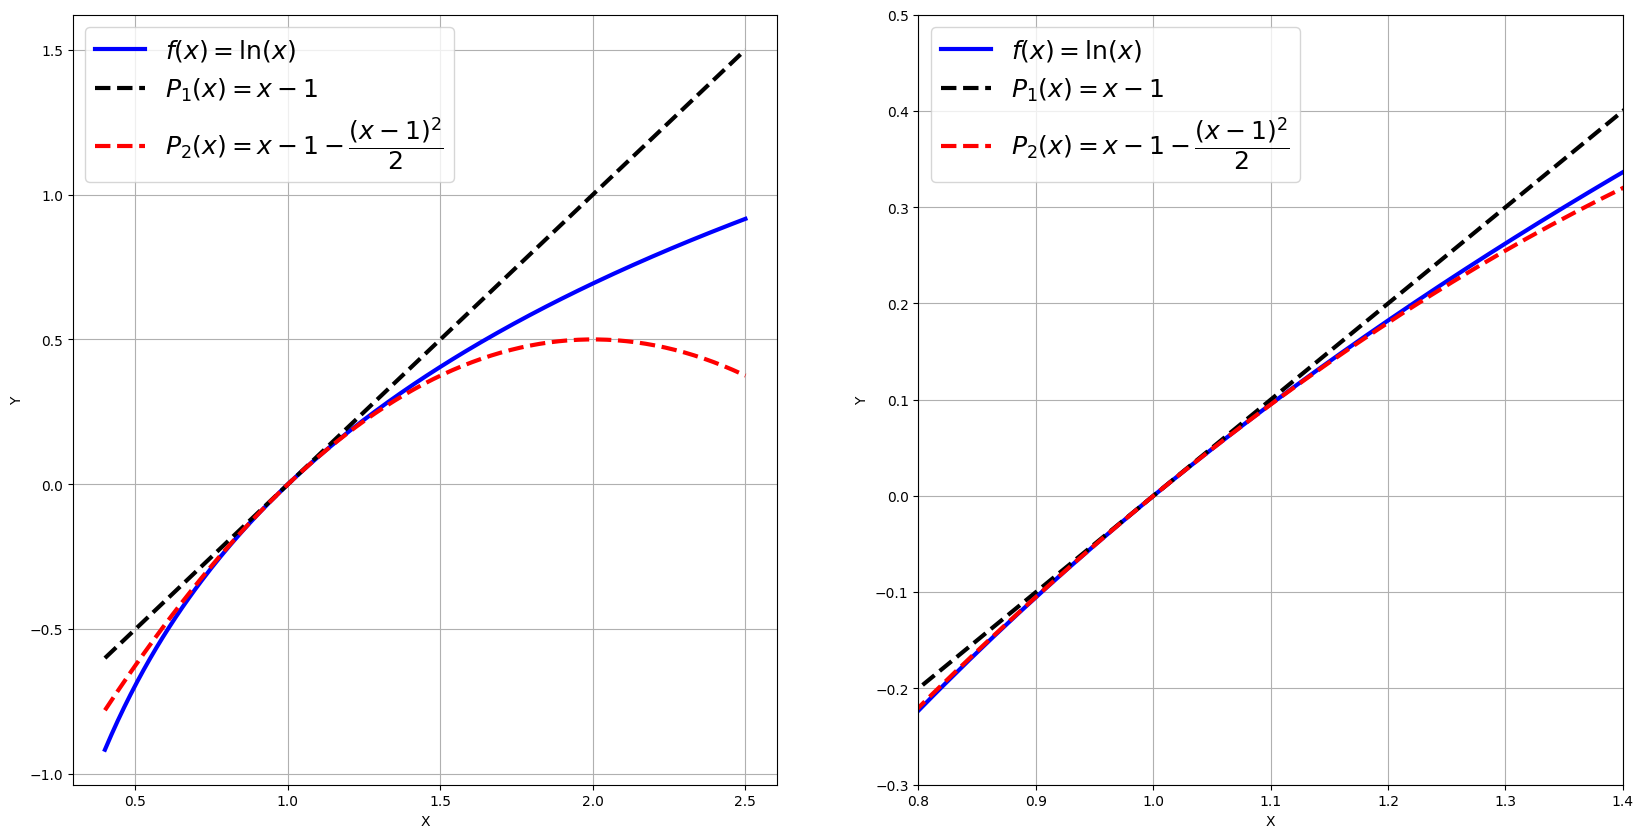

In [20]:
# Convertimos P1 y P2 en funciones `lambdify` para poder dibujarlas
P1_lamb = sp.lambdify(x,P1)
P2_lamb = sp.lambdify(x,P2)

# Creamos gráficos de funciones
x1 = np.linspace(0.4, 2.5, 200)
y1 = np.log(x1)

# evaluamos P2 en los puntos de x1
P1x = P1_lamb(x1)
P2x = P2_lamb(x1)

fig, axs = plt.subplots(1, 2, figsize=(20,10))

ax1 = axs[0]
ax1.plot(x1, y1, c='b', lw='3',  label='$f(x)=\ln(x)$')
ax1.plot(x1, P1x, c='k', ls='--', lw='3', label='$P_1(x)=x-1$')
ax1.plot(x1, P2x, c='r', ls='--', lw='3', label='$P_2(x)=x-1 - \dfrac{(x-1)^2}{2}$')
ax1.set_ylabel('Y', fontsize=10)
ax1.set_xlabel('X', fontsize=10)
ax1.grid()
ax1.legend(prop={'size': 18})


ax2 = axs[1]
ax2.plot(x1, y1, c='b', lw='3', label='$f(x)=\ln(x)$')
ax2.plot(x1, P1x, c='k', ls='--', lw='3', label='$P_1(x)=x-1$')
ax2.plot(x1, P2x, c='r', ls='--', lw='3', label='$P_2(x)=x-1 - \dfrac{(x-1)^2}{2}$')
ax2.set_ylabel('Y', fontsize=10)
ax2.set_xlabel('X', fontsize=10)
plt.xlim(0.8,1.4)
plt.ylim(-0.3,0.5)
ax2.set_xticks(np.arange(0.8,1.5,0.1))
ax2.set_yticks(np.arange(-0.3,0.6,0.1))
ax2.grid()
ax2.legend(prop={'size': 18})

Tenemos

$$
\begin{array}{rl}
 f(x)=\ln(x) &\Rightarrow& f(x_0)=f(1)=\ln(1)=0, \\
 f'(x)=\frac{1}{x} &\Rightarrow& f'(x_0)=f'(1)=\frac{1}{1}=1, \\
 f''(x)=-\frac{1}{x^2} &\Rightarrow& f''(x_0)=f''(1)=-\frac{1}{1}=-1, \\
 f'''(x)=\frac{2}{x^3}. \\
\end{array}
$$

Entonces,

$$
P_{2,f,1}(x)=f(1)+\frac{f'(1)}{1!}(x-1)+\frac{f''(1)}{2!}(x-1)^2=(x-1)-\frac{(x-1)^2}{2}.
$$
Así que

$$
\ln(1.3)=f(1.3)\approx
P_{2,f,1}(1.3)=1.3-1-\frac{(1.3-1)^2}{2}=0.3-\frac{0.09}{2} = \frac{51}{200}=0.255.
$$

Recordemos que $\ln(1.3)=0.262364264467491...$ y la aproximación obtenida mediante la recta tangente es $P_{1,f,1}(1.3)=0.3$. Vemos que $P_{2,f,1}(1.3)=0.255$ es una buena aproximación del valor de $\ln(1.3)$ y, como cabía esperar, mejor que la que corresponde al polinomio de Taylor de orden 1.

Vamos a acotar el error utilizando lo que acabamos de explicar:

$$
\left|f(1.3)-P_{n=2,f,x_0=1}(1.3)\right|=\frac{\left|f'''(\xi)\right|}{3!}\left|1.3-1\right|^{3} \leq  \frac{\sup_{s\in[1,1.3]} \left|f'''(s)\right|}{3!}0.3^{3}.
$$
Entonces... sólo nos falta calcular ese supremo!

$$
\sup_{s\in[1,1.3]} \left|f'''(s)\right| = \sup_{s\in[1,1.3]}
\left|\frac{2}{s^3}\right| \stackrel{(*)}{=} \frac{2}{1^3} = 2. 
$$
$(*)$ por ser la función $\frac{2}{s^3}$ positiva y decreciente,
alcanza su máximo en valor absoluto en el extremo de la izquierda (es decir, en $s=1$).  

## Ejercicio propuesto

Usando `Python` calcula el polinomio de Taylor de diferentes órdenes para $f(x)=\cos(x)$ centrado en 0, y comprueba gráficamente como los de mayor orden aproximan mucho mejor la función dada.

## Ejercicios para practicar un poco más

* https://existelimite.blogspot.com/2012/12/ejercicio-de-taylor.html
* https://existelimite.blogspot.com/2013/01/aproximar-una-raiz-cuarta-con-el.html
* https://existelimite.blogspot.com/2013/10/una-cuestion-sobre-el-polinomio-de.html
* https://existelimite.blogspot.com/2021/10/otro-ejercicio-de-taylor-este-para-una.html